In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [2]:
salary_train=pd.read_csv("C:/Users/LENOVO/Desktop/SVM/SalaryData_Train(1).csv")
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
salary_test=pd.read_csv("C:/Users/LENOVO/Desktop/SVM/SalaryData_Test(1).csv")
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
print("______________Train data details_________________")
print(salary_train.info())
print("_______________Test data details_______________")
print(salary_test.info())

______________Train data details_________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB
None
_______________Test data details_______________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

In [5]:
salary_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30161.0,38.438115,13.134830,17.0,28.0,37.0,47.0,90.0
educationno,30161.0,10.121316,2.550037,1.0,9.0,10.0,13.0,16.0
capitalgain,30161.0,1092.044064,7406.466611,0.0,0.0,0.0,0.0,99999.0
capitalloss,30161.0,88.302311,404.121321,0.0,0.0,0.0,0.0,4356.0
hoursperweek,30161.0,40.931269,11.980182,1.0,40.0,40.0,45.0,99.0


In [6]:
salary_test.describe().T

,count,mean,std,min,25%,50%,75%,max
age,15060.0,38.768327,13.380676,17.0,28.0,37.0,48.0,90.0
educationno,15060.0,10.112749,2.558727,1.0,9.0,10.0,13.0,16.0
capitalgain,15060.0,1120.301594,7703.181842,0.0,0.0,0.0,0.0,99999.0
capitalloss,15060.0,89.041899,406.283245,0.0,0.0,0.0,0.0,3770.0
hoursperweek,15060.0,40.951594,12.062831,1.0,40.0,40.0,45.0,99.0


In [7]:
salary_train.shape , salary_test.shape

((30161, 14), (15060, 14))

In [8]:
for feature in salary_train.columns:
    if(salary_train[feature].dtype=='object'):
        print("***************************")
        print("feature             {}".format(feature))
        print("------------------------------------")
        print(salary_train[feature].value_counts())

***************************
feature             workclass
------------------------------------
 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
***************************
feature             education
------------------------------------
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
***************************
feature             maritalstatus
------------------------------------
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated    

In [9]:
print("train--------Salary.value_counts()-")
print(salary_train.Salary.value_counts())
print("******************************")
print("test-------Salary.value_counts()-")
print(salary_test.Salary.value_counts())

train--------Salary.value_counts()-
 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64
******************************
test-------Salary.value_counts()-
 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64


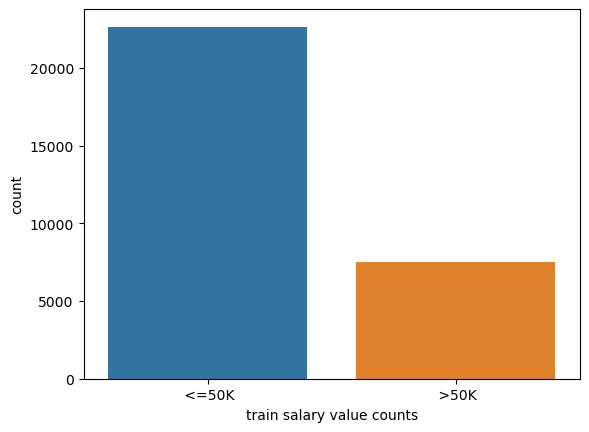

In [10]:
sns.countplot(x='Salary',data=salary_train)
plt.xlabel("train salary value counts")
plt.show()

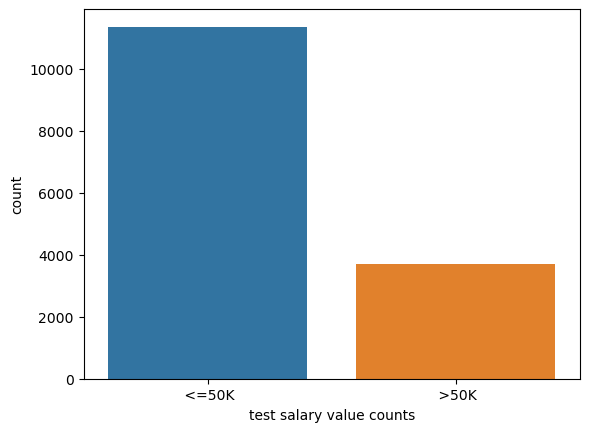

In [11]:
sns.countplot(x='Salary', data=salary_test)
plt.xlabel("test salary value counts")
plt.show()

In [12]:
salary_train.shape,salary_test.shape

((30161, 14), (15060, 14))

In [13]:
salary_train[salary_train.duplicated()]
# these data will not be considered as duplicated because only some features are matching not whole data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [14]:
encoding_col=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

In [15]:
encodLabel=LabelEncoder()
for i in encoding_col:
    salary_train[i]=encodLabel.fit_transform(salary_train[i])
    salary_test[i]=encodLabel.fit_transform(salary_test[i])

In [16]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [17]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [22]:
def norm(i):
    return (i-i.min())/(i.max()-i.min())

In [23]:
x_train=salary_train.iloc[:,0:13]
y_train=salary_train.iloc[:,13]
x_test=salary_test.iloc[:,0:13]
y_test=salary_test.iloc[:,13]

In [24]:
x_train=norm(x_train)
x_test=norm(x_test)

In [25]:
x_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.02174,0.0,0.397959,0.948718
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.00000,0.0,0.122449,0.948718
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.00000,0.0,0.397959,0.948718
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.00000,0.0,0.397959,0.948718
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.00000,0.0,0.397959,0.102564


In [26]:
y_train.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: Salary, dtype: object

## Model building

In [27]:
# model one
# default kernel is 'rbf'
model=SVC()
model.fit(x_train,y_train)
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

print("train accuracy score of model 1", accuracy_score(y_train,train_pred))
print("test accuracy score of model 1", accuracy_score(y_test,test_pred))

train accuracy score of model 1 0.8445343324160339
test accuracy score of model 1 0.8432934926958832


In [28]:
# model two
model2=SVC(kernel='linear')
model2.fit(x_train,y_train)
train_pred=model2.predict(x_train)
test_pred=model2.predict(x_test)

print("train accuracy score of model 2", accuracy_score(y_train,train_pred))
print("test accuracy score of model 2", accuracy_score(y_test,test_pred))

train accuracy score of model 2 0.8122741288418819
test accuracy score of model 2 0.8096945551128818


In [29]:
# model three
model3=SVC(kernel='poly')
model3.fit(x_train,y_train)
train_pred=model3.predict(x_train)
test_pred=model3.predict(x_test)

print("train accuracy score of model 3", accuracy_score(y_train,train_pred))
print("test accuracy score of model 3", accuracy_score(y_test,test_pred))

train accuracy score of model 3 0.8450979742050992
test accuracy score of model 3 0.8435590969455511


In [31]:
# model four
model4=SVC(kernel='poly')
model4.fit(x_train,y_train)
train_pred=model4.predict(x_train)
test_pred=model4.predict(x_test)

print("train accuracy score of model 4", accuracy_score(y_train,train_pred))
print("test accuracy score of model 4", accuracy_score(y_test,test_pred))

train accuracy score of model 4 0.8450979742050992
test accuracy score of model 4 0.8435590969455511


In [33]:
# GridSearch
model6=SVC()
param={'kernel':['linear','poly'],
      'gamma':[0.6,0.3,0.1,0.01],
      }
gscv=GridSearchCV(model6,param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'gamma': [0.6, 0.3, 0.1, 0.01],
                         'kernel': ['linear', 'poly']})

In [34]:
gscv.best_estimator_

SVC(gamma=0.6, kernel='poly')

In [35]:
gscv.best_score_

0.8428435437542676

In [37]:
# model final
modelfinal=SVC(kernel='poly', gamma=0.6)
modelfinal.fit(x_train,y_train)
train_pred=modelfinal.predict(x_train)
test_pred=modelfinal.predict(x_test)

print("train accuracy score of model final", accuracy_score(y_train,train_pred)*100)
print("test accuracy score of model final", accuracy_score(y_test,test_pred)*100)

train accuracy score of model final 84.50979742050993
test accuracy score of model final 84.32270916334662


In [38]:
confusion_matrix(y_test,test_pred)

array([[10620,   740],
       [ 1621,  2079]], dtype=int64)

In [39]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90     11360
        >50K       0.74      0.56      0.64      3700

    accuracy                           0.84     15060
   macro avg       0.80      0.75      0.77     15060
weighted avg       0.84      0.84      0.84     15060

